# Notebook | PhyNum : motifs au fond d'une piscine

## Import

In [1]:
from PhyNum import *

## Initialisations

In [2]:
u = np.array([0, 0, -1])  # direction de la lumière

theta = 0

Ry = np.array([[np.cos(theta), 0, np.sin(theta)],
                [0, 1, 0],
                [-np.sin(theta), 0, np.cos(theta)]])

u = Ry @ u



# Déplacement nécessaire des rayons en fonction de leur angle d'incidence (mesuré entre u et ux)
dux = (Lz-h)*np.tan(theta) * np.array([1, 0, 0])

rayons = []
for i in range(Nx+1-1):
    rayons.append([])
    for j in range(Ny+1-1):
        rayons[i].append((np.array([(i+1/2)*dx, (j+1/2)*dy, Lz]) + dux, u))


In [3]:
A*=10

# Définition d'une surface d'eau
surface = h + A*np.sin(Kx*grille_X) * np.sin(Ky*grille_Y)
w = omega(Kx, Ky)
surface1 = h + A*np.sin(Kx*grille_X) * np.sin(Ky*grille_Y) * np.cos(w*dt)

# fact_A = 900 # (bien pour 900)
# # (utilisation du Perlin noise)
# for i in range(Nx+1):
#     for j in range(Ny+1):
#         scale = Lx*3 # 3 ou 20
#         surface[i][j] = h + noise.pnoise2(i/scale, j/scale, octaves=2)*scale/fact_A



## Calculs

In [4]:
trajectoires = calcul_trajectoires(rayons, surface)


Calcul des trajectoires : 100%|██████████| 20/20 [00:00<00:00, 81.61it/s]


In [5]:
motif = calcul_motifs(trajectoires)

motif = np.sqrt(motif)

image = motif_to_alpha(motif)
plt.imsave("image Nx=" + str(Nx) + ".png", image)


## Affichage

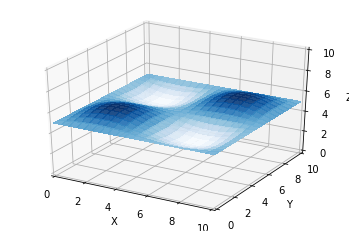

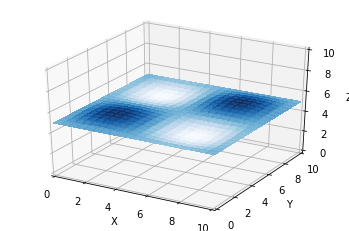

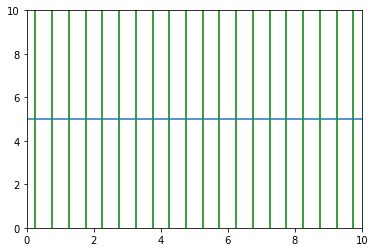

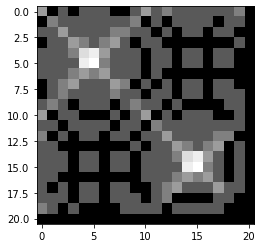

In [6]:
plot_surface(surface)
plt.show()

plot_surface(surface1)
plt.show()



affiche_rayons(trajectoires, surface, save=True)
plt.show()


plt.imshow(motif, cmap='gray')
plt.imsave("motif Nx=" + str(Nx) + ".png", motif, cmap='gray')
plt.show()


In [7]:
genere_animation_simple(surface, surface-h, surface1-h)

images = [Image.open(f"Frames/frame{n}.png") for n in range(frames)]

images[0].save('wave Nx='+ str(Nx) + ' kc=' + str(kc)+ '.gif', save_all=True,
               append_images=images[1:], duration=dt*10**3, loop=0)


100%|██████████| 100/100 [03:15<00:00,  1.95s/it]
